In [7]:
import pandas as pd
import numpy as np

In [8]:
data = pd.read_csv('./data/pose.csv')
print(data.columns)

Index(['Unnamed: 0', 'left_shoulder_x', 'left_shoulder_y', 'right_shoulder_x',
       'right_shoulder_y', 'left_elbow_x', 'left_elbow_y', 'right_elbow_x',
       'right_elbow_y', 'left_wrist_x', 'left_wrist_y', 'right_wrist_x',
       'right_wrist_y'],
      dtype='object')


In [9]:
def length(x1,y1,x2,y2):
    x = np.sqrt((x1-x2)**2+(y1-y2)**2)
    print(x)
    return x

In [10]:
data['left_shoulder_elbow'] = length(data['left_shoulder_x'],data['left_shoulder_y'],data['left_elbow_x'],data['left_elbow_y'])
data['left_elbow_wrist'] = length(data['left_elbow_x'],data['left_elbow_y'],data['left_wrist_x'],data['left_wrist_y'])
data['left_wrist_shoulder'] = length(data['left_wrist_x'],data['left_wrist_y'],data['left_shoulder_x'],data['left_shoulder_y'])

0      275.975033
1      281.250013
2      277.715373
3      268.835947
4      268.908574
          ...    
352    238.336408
353    239.373497
354    239.223863
355    240.057748
356    239.534840
Length: 357, dtype: float64
0      243.275613
1      245.741286
2      244.617810
3      245.536849
4      243.358769
          ...    
352    175.685978
353    175.745853
354    176.077844
355    175.024178
356    173.646400
Length: 357, dtype: float64
0      188.490495
1      184.598969
2      182.165067
3      178.362336
4      173.926246
          ...    
352    146.765372
353    146.236662
354    143.822951
355    143.309858
356    143.075947
Length: 357, dtype: float64


In [11]:
import math
# cos(x) = (A^2 + b^2 - C^2 ) /(2AB)
# 코사인의 역함수를 이용하여 각도를 구한다.
data['left_arm_angle'] = data.apply(lambda x: math.degrees(math.acos((x['left_shoulder_elbow']**2+x['left_elbow_wrist']**2-x['left_wrist_shoulder']**2)/(2*x['left_shoulder_elbow']*x['left_elbow_wrist']))), axis=1)
print(data['left_arm_angle'])


0      41.980822
1      40.306201
2      40.197414
3      40.258487
4      39.298053
         ...    
352    37.846397
353    37.443909
354    36.698179
355    36.300174
356    36.282384
Name: left_arm_angle, Length: 357, dtype: float64


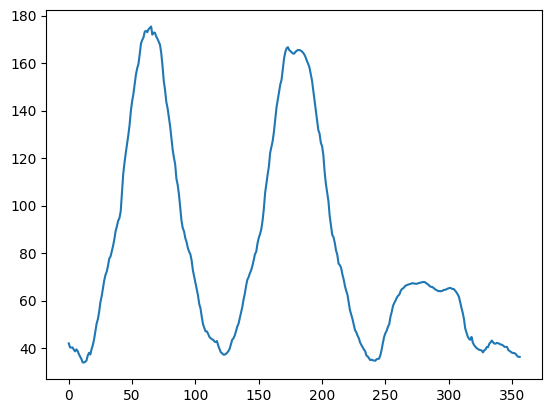

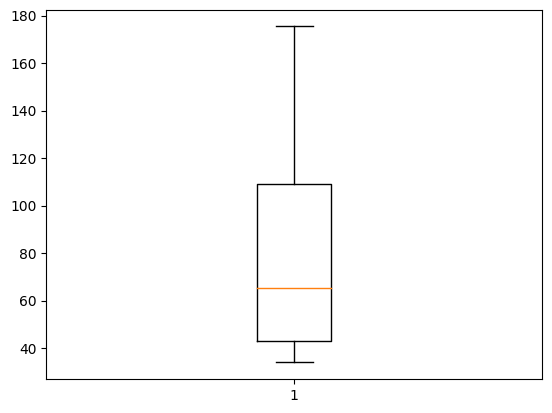

In [12]:
import matplotlib.pyplot as plt

plt.plot(data['left_arm_angle'])
plt.show()
plt.boxplot(data['left_arm_angle'])
plt.show()